# Chapter6: 近似解法と発見的解法

In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

## 6.1
(問) 最小木問題の最適解を利用した巡回セールスマン問題の近似解法を考える.重み付き無向グラフ$G(V, E, c)$が与えられている.ただし, 任意の2点間には辺が存在し, 辺の重みは正で三角不等式を満たす. 図6.13(a)は6つの点からなるグラフ$G$の例であり, 各辺の重みはその端点間のユークリッド距離でさだめられている. 近似解としては, まず$G$の最小木を求める. 次に最小木の各辺を2本ずつにし, それぞれに異なる向きをつける. そして, この向きのついた辺をすべてたどる経路を考える. この経路ですでに一度訪れた点はスキップすることにすると, 巡回路が得られる. この巡回路が巡回セールスマン問題の近似解になっている.

(i)図6.13(a)のグラフにおいて, 点$v_5$を始点にした場合はどのような近似解が得られるか

(ii)この解法が2-近似解法であることを示せ

(答) 

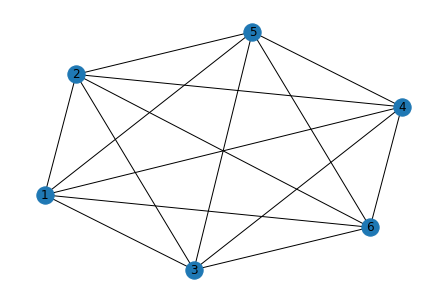

In [13]:
n = 6
G = nx.complete_graph(n)
pos = nx.spring_layout(G)
nx.draw(G, pos)
nx.draw_networkx_labels(G, pos, labels = dict(zip(range(n), range(1, n+1))))
plt.show()

## 6.2
(問) 無向グラフ$G(V, E)$が与えられたとき, カット$(S, V-S)$含まれる辺の数が最大になるような$V$の部分集合$S$を求める問題を, $最大カット問題$とよぶ. 次の問に答えよ.

(i)最大カット問題に対して次の局所探索法を考える. まず, $V$からランダムにいくつかの点を選んで$S$とする.次に$V-S$に属する点のうち, それを$S$に移すことでカットの本数が増える点をSに移す. また, 同様に$S$に属する点のうち, それを$V-S$に移すことでカットの本数が増える点を$V-S$に移す.このような操作を$S$が更新されなくなるまで繰り返す.この局所探索法は最大カット問題の0.5-近似解法であることを示せ.

(ii)最大カット問題に対して, 列モジュラ最大化に基づく貪欲算法を設計せよ

(答) 

## 6.3
(問) データ点の集合$V = \{\bm{s}_{1}, \dots, \bm{s}_{m}\}$から$k$点を選び, それらをクラスター中心と呼ぶ. そして, 各データ点を最も近いクラスター中心に割り当てることで, クラスター$C_{1},\dots, C_{k}$を構成する. 各クラスターの大きさを, クラスター中心からそのクラスターの属する店までの距離の最大値で定義する. このとき, クラスターのうちで大きさが最大のものに着目し, その大きさができるだけ小さくなるクラスタリングを求めたい. つまり, $k$のクラスター中心の集合$U(\subset V)$のうち$$\max\{\rho(\bm{s}_{l}, U)|\bm{s}_{l}\in V\}$$の値を最小化するものを求める最適化問題を考える. ただし, $$\rho(\bm{s}_{l}, U)=\min\{\rho(\bm{s}_{l}, \bm{s}_{h}) | \bm{s}_{h} \in U\}$$この問題はk-センター問題と呼ばれている.次の問に答えよ.

(i)最遠点クラスタリング法により, k-センター問題の2-近似解が得られることを示せ.

(ii)最遠点クラスタリング法で得られる解の目的関数値が, k-センター問題の最適値のちょうど2倍になるようなデータの例をあげよ

(答) 

## 6.4
(問) 無向グラフ$G=(V, E)$に関して, 次の問に答えよ. 

(i) 点集合$S\subseteq V$に属する点を端点とする辺の数を$f(S)$で表すとき$f$が列モジュラ関数であることを示せ.

(ii)辺集合$T \subseteq E$に属する辺の端点である点の数を$g(T)$で表すとき, $g$が列モジュラ関数であることを示せ.

(答) 